# Identitas Diri
Nama : Aditya Herdiansyah Putra  
NIM  : A11.2021.13948

# Menambahkan library
 "numpy" berguna memudahkan kita melakukan perhitungan saintifik seperti matriks, aljabar, statistik, dan sebagainya.    
 "matpotlib.pyplot" berguna untuk memvisualisaikan data melalui grafik atau diagram      
 "pandas" berguna untuk memproses data, mulai pembersihan data, manipulasi data, hingga melakukan analisis data.
 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import dataset
Mengimport dataset dan kemudian pisahkan untuk atribut ditampung pada variable x dan untuk label ditampung pada variable y agar data tersebut bisa dilakukan proses klasifikasi. Setelah itu, kita tampilkan variable x dan y untuk memastikan bahwa perintah sudah berhasil dijalankan.

In [76]:
dataset = pd.read_csv("house_price.csv")

In [77]:
dataset.head()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket_km,crime_rate_index,room_size,property_value
0,201,177,3,1,0,1,1,0,3.3,1,10,0,6.8,0.90,0,165432
1,196,182,4,3,1,1,0,1,1.2,1,11,0,4.1,1.42,1,187043
2,198,182,4,4,1,1,0,1,5.9,0,20,0,2.1,4.12,1,148658
3,178,166,2,3,0,1,0,0,5.9,0,5,0,0.7,4.36,0,123785
4,183,165,3,1,1,1,0,0,3.8,1,8,0,0.7,0.42,0,156470


In [203]:
x = dataset.iloc[:, [0, 1]].values

In [204]:
y = dataset.iloc[:, 4].values

In [205]:
print(x)

[[201 177]
 [196 182]
 [198 182]
 ...
 [153 147]
 [180 158]
 [695 619]]


In [206]:
print(y)

[0 1 1 ... 1 0 1]


# Memisahkan data untuk Training dan Testing
Memisahkan data yang mana sebanyak 3/4 dari data akan digunakan untuk Training sedangkan untuk sisanya yaitu 1/4 digunakan untuk Testing. Pada proses ini, saya memanfaatkan library dari sklearn.model_selection dan menggunakan function train_test_split.

In [207]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)


In [208]:
print(x_train)

[[212 198]
 [185 184]
 [277 274]
 ...
 [214 194]
 [134 115]
 [345 319]]


In [209]:
len(x_train)

3715

In [210]:
len(x_test)

1239

In [211]:
len(y_train)

3715

In [212]:
len(y_test)

1239

In [213]:
len(x)

4954

In [214]:
len(y)

4954

# Mengubah data menjadi skala
Proses ini dilakukan karena data x_train dan x_test memiliki jarak/interval yang cukup jauh maka agar memudahkan saya dalam memproses data tersebut maka saya membutuhkan skala. Pada proses ini saya menggunakan StandartScaler dari library sklearn.preprocessing.

In [215]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [216]:
print(x_train)

[[-0.3657805  -0.34723943]
 [-0.63060523 -0.49685852]
 [ 0.27176053  0.46497852]
 ...
 [-0.34616385 -0.38998774]
 [-1.13082973 -1.23426692]
 [ 0.93872652  0.94589704]]


In [217]:
print(x_test)

[[ 0.91910987  0.97795828]
 [-0.32654721 -0.46479729]
 [ 0.44831035  0.44360437]
 ...
 [ 0.54639358  0.64665885]
 [-0.30693056 -0.30449111]
 [ 1.31144281  1.37338017]]


# Menggunakan KNN
Untuk menggunakan metode KNN maka saya menggunakan library skelarn.neighbors dan mengimport KneighborsClassifier.

In [225]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

# Menghitung Prediksi
Dalam menghitung prediksi saya menggunakan funtion predict

In [226]:
y_pred = classifier.predict(x_test)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Menghitung Evaluasi
Pada proses ini dimaksudkan untuk mengetahui tingkat keakuratan/nilai akurasinya. Saya menggunakan diagram confussion matriks untuk mengetahui tingkat keakuratan/ nilai akurasi dari data testing terhadap data prediksi diatas.

In [227]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[153 175]
 [119 792]]


Maka dari data yang dihasilkan diatas dapat saya hitung bahwa total tingkat akurasinya yaitu 0.76. yaitu dengan membagi 153+792 dengan jumlah keseluruhan dari data yaitu 175+153+119+792 maka dapat menghasilkan tingkat kakuratannya.

# Memvisualisasikan hasil Training Set

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its l

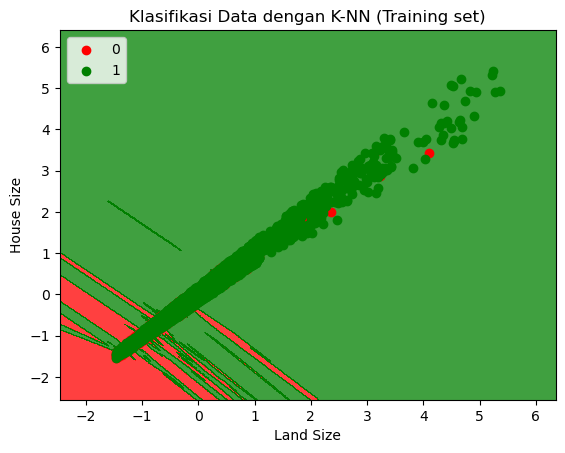

In [228]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Training set)')
plt.xlabel('Land Size')
plt.ylabel('House Size')
plt.legend()
plt.show()

# Memvisualisasikan hasil Test Set

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its l

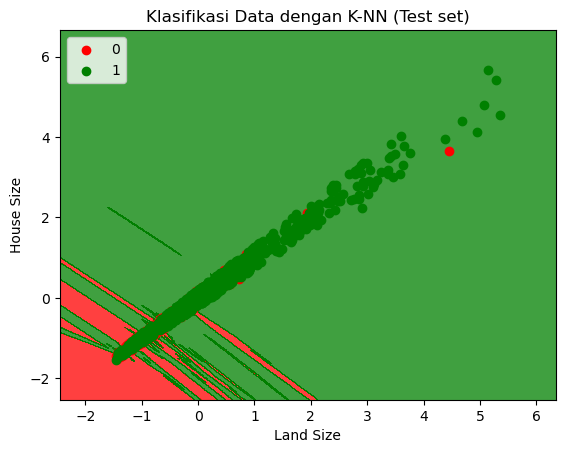

In [230]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Test set)')
plt.xlabel('Land Size')
plt.ylabel('House Size')
plt.legend()
plt.show()